Nama : Nathaniel Ignacio W 
NPM : 220711710
Nama : Yakobus Dimas Juan W
NPM : 220711807
Kelompok SB : SciPy
Topik : Klasifikasi Jenis Apel Berdasarkan Warna
Arsitektur yang dikerjakan : AlexNet

Found 300 files belonging to 3 classes.


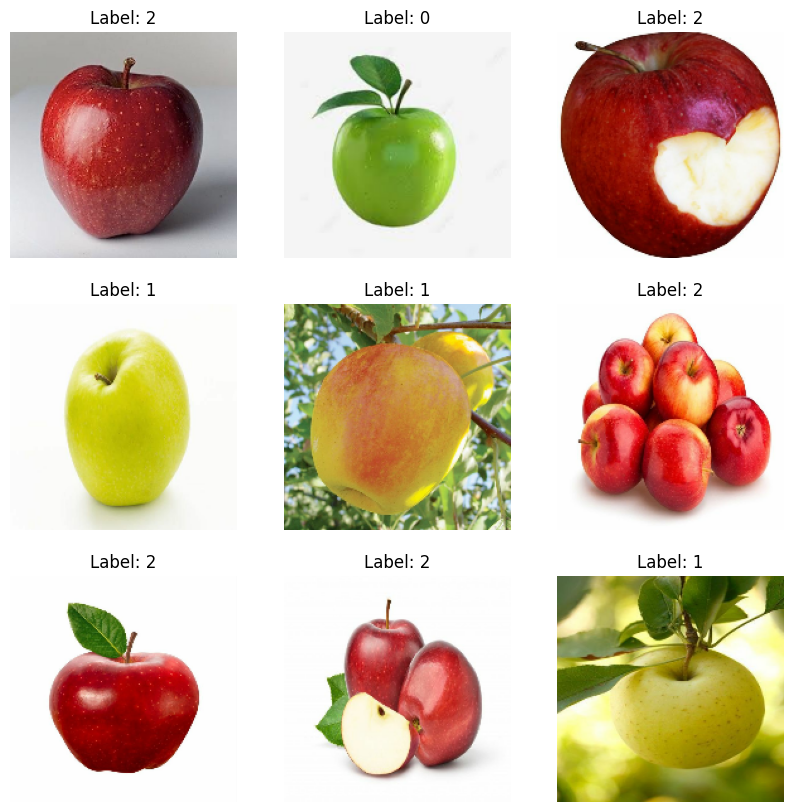

Total Images: 10
Train Images: 9
Validation Images: 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


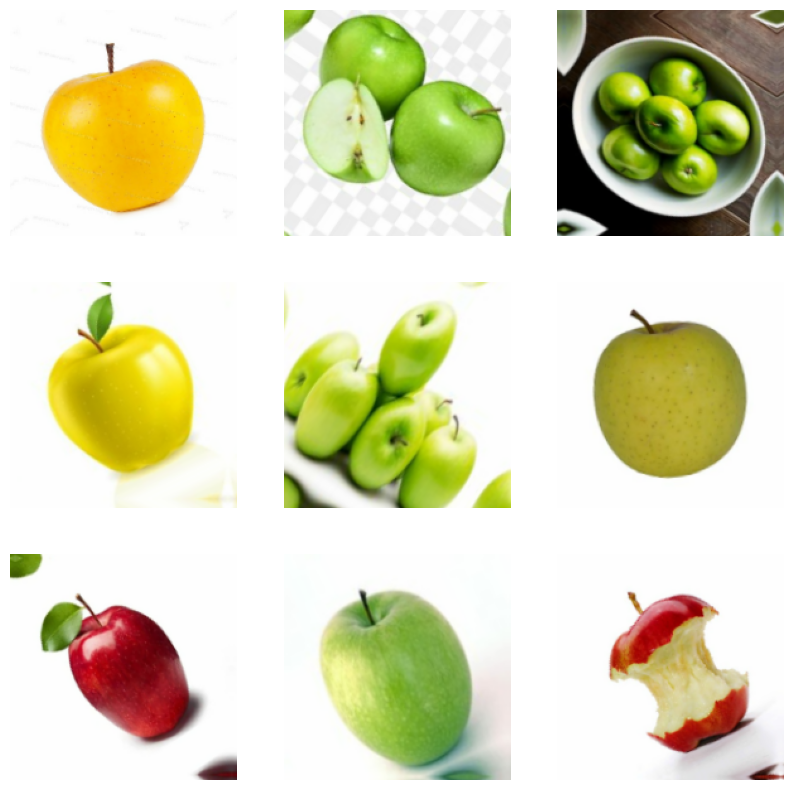

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - accuracy: 0.3607 - loss: 331.8510 - val_accuracy: 0.4062 - val_loss: 1.1938
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3361 - loss: 1.2006 - val_accuracy: 0.3438 - val_loss: 1.0523
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3407 - loss: 1.0763 - val_accuracy: 0.4375 - val_loss: 0.9752
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3875 - loss: 1.0521 - val_accuracy: 0.4688 - val_loss: 0.8688
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4517 - loss: 0.9329 - val_accuracy: 0.5938 - val_loss: 0.6921
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6125 - loss: 0.5919 - val_accuracy: 0.5938 - val_loss: 0.7552
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6133 - loss: 0.6350 - val_accuracy: 0.6250 - val_loss: 0.5335
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7254 - loss: 0.4808 - val_accuracy: 0.6875 - val_loss: 0.4962
Epoch 9

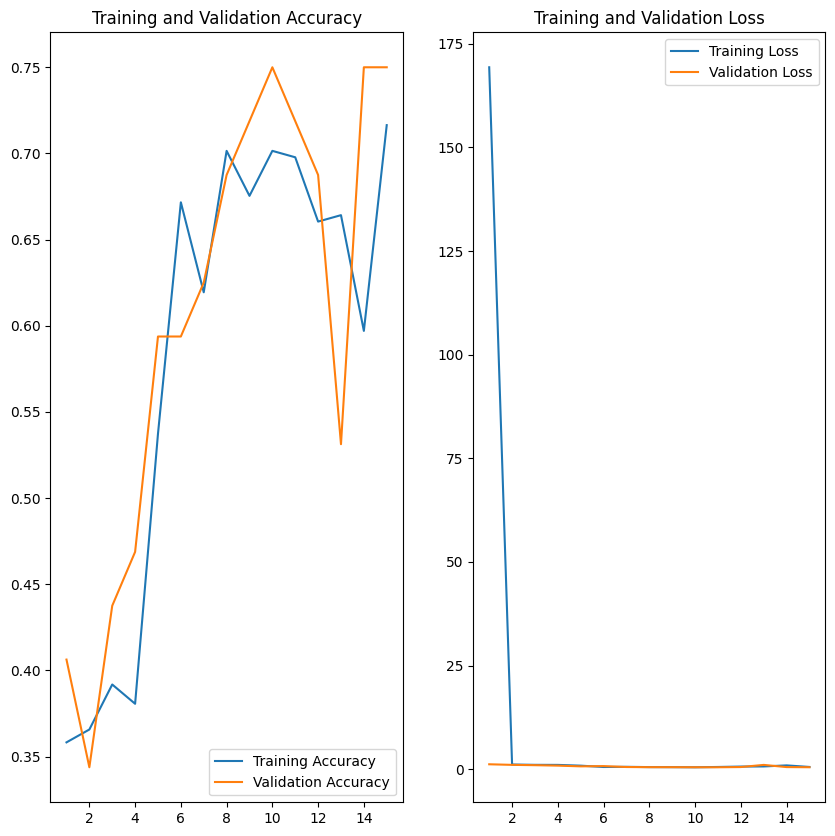

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


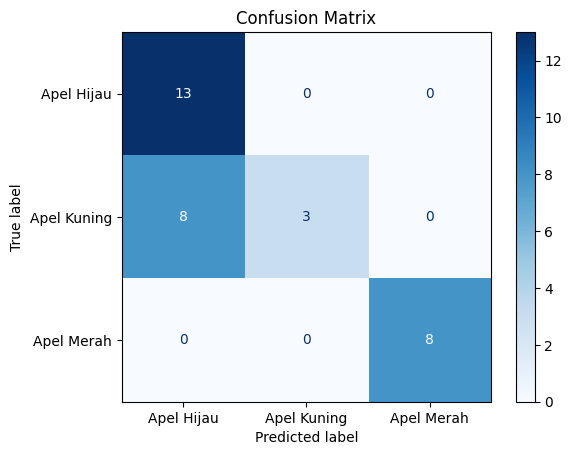

              precision    recall  f1-score   support

  Apel Hijau       0.62      1.00      0.76        13
 Apel Kuning       1.00      0.27      0.43        11
  Apel Merah       1.00      1.00      1.00         8

    accuracy                           0.75        32
   macro avg       0.87      0.76      0.73        32
weighted avg       0.85      0.75      0.71        32



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Prediksi: Apel Merah
Confidence: 57.61%


('Apel Merah', 57.611674070358276)

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

img_size = 180
batch_size = 32
data_dir = '/content/drive/MyDrive/UAS PMDPM/DATASET APEL'

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size,
)

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
plt.show()

validation_split = 0.1
total_count = len(list(dataset.as_numpy_iterator()))
val_count = int(total_count * validation_split)
train_ds = dataset.skip(val_count)
val_ds = dataset.take(val_count)

print(f"Total Images: {total_count}")
print(f"Train Images: {total_count - val_count}")
print(f"Validation Images: {val_count}")

data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

plt.figure(figsize=(10, 10))
for images, _ in dataset.take(1):
    augmented_images = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

def alexnet(input_shape, n_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(n_classes, activation='softmax'))
    return model

input_shape = (img_size, img_size, 3)
n_classes = 3
model = alexnet(input_shape, n_classes)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[early_stopping])

epochs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('/content/drive/MyDrive/UAS_PMDPM/AlexNet_Model.h5')

y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

class_names = ['Apel Hijau', 'Apel Kuning', 'Apel Merah']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

model = load_model('/content/drive/MyDrive/UAS_PMDPM/AlexNet_Model.h5')

def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    class_idx = np.argmax(result)
    confidence = np.max(result) * 100
    print(f"Prediksi: {class_names[class_idx]}")
    print(f"Confidence: {confidence:.2f}%")
    return class_names[class_idx], confidence


In [21]:
image_path = '/content/drive/MyDrive/UAS PMDPM/Test/TestApelMerah/testApelMerah01.jpg'
classify_images(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediksi: Apel Merah
Confidence: 57.61%


('Apel Merah', 57.611674070358276)

In [20]:
image_path = '/content/drive/MyDrive/UAS PMDPM/Test/TestApelHijau/testApelHijau01.jpg'
classify_images(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediksi: Apel Hijau
Confidence: 47.52%


('Apel Hijau', 47.51593768596649)